In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

# Time-Series Analysis

Time series is a series of data points indexed in time order. The data is organized by relatively deterministic timestamps and contains additional information we can extract.

### Dataset Description

To have a little fun we once again take a look at Russian Bot posts on twitter.

In [2]:
df = pd.read_csv('data/IRAhandle_tweets.csv')

In [3]:
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


Before we analyze our dataset let set if our time columns are actually time-series objects.

In [4]:
df.dtypes

external_author_id     int64
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following              int64
followers              int64
updates                int64
post_type             object
account_type          object
retweet                int64
account_category      object
new_june_2018          int64
alt_external_id        int64
tweet_id               int64
article_url           object
tco1_step1            object
tco2_step1            object
tco3_step1            object
dtype: object

We can see `publish_date`, and `harvested_date` all need to be converted to the `datetime` form

`datetime` is a module that supplies classes for manipulating dates and times in both simple and complex ways. `date` and `time` arithmetic is supported, the focus of the implementation is on efficient attribute extraction for output formatting and manipulation.

Let's convert these columns to datetime format.

In [5]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

### Exercise 1

* Convert the `harvested_date` to the datetime column

In order to plot with pandas the time must be the index of the dataframe.

In [6]:
df = df.set_index('publish_date')

In [7]:
df.head()

,external_author_id,author,content,region,language,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
publish_date,,,,,,,,,,,,,,,,,,,,
2017-10-01 19:58:00,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
2017-10-01 22:43:00,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2017-10-01 22:50:00,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
2017-10-01 23:52:00,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
2017-10-01 02:13:00,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


Now, we can plot the number of tweets over time.

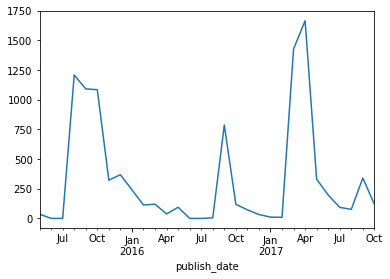

In [8]:
df['external_author_id'].resample('M').count().plot()

The plot above demonstrates the number of events shown over time. Now it is your turn!

# Exercise 2

* Choose any one of the time-series columns
* Plot the number of events over time

We also look at the mean and standard deviation of the number of tweet published over time.

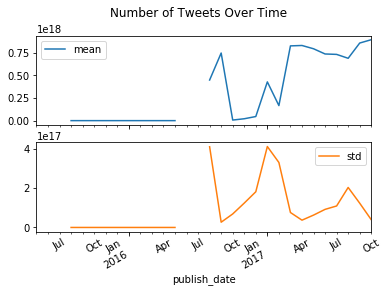

In [9]:
r = df['external_author_id'].resample('M').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Tweets Over Time')
plt.show()

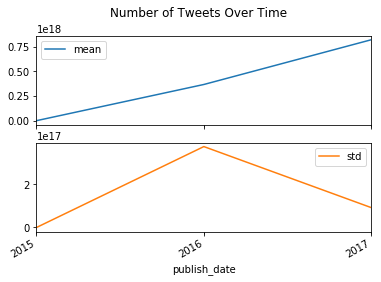

In [10]:
r = df['external_author_id'].resample('1Y').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Tweets Over Time')
plt.show()

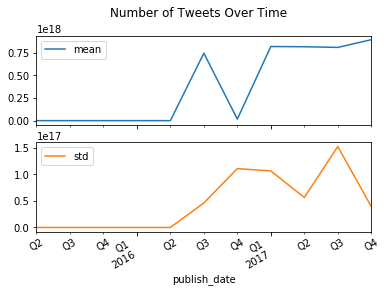

In [11]:
r = df['external_author_id'].resample('Q').agg(['mean', 'std'])
r.plot(subplots=True, title='Number of Tweets Over Time')
plt.show()

Resample over a week, compute the mean and compare accross multiple values.

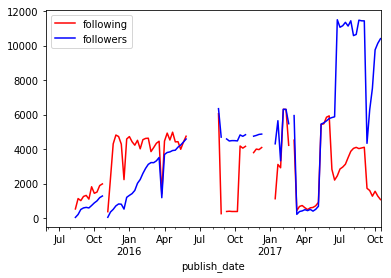

In [12]:
df['following'].resample('W').mean().plot(color='r', legend=True)
df['followers'].resample('W').mean().plot(color='b', legend=True)
plt.show()

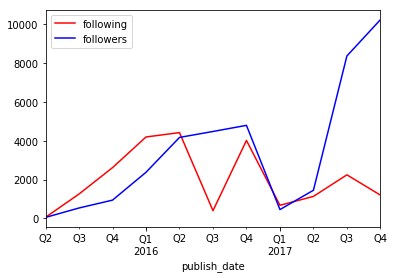

In [13]:
df['following'].resample('Q').mean().plot(color='r', legend=True)
df['followers'].resample('Q').mean().plot(color='b', legend=True)
plt.show()

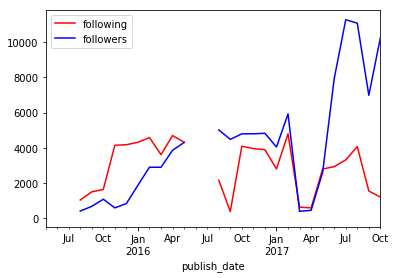

In [14]:
df['following'].resample('M').mean().plot(color='r', legend=True)
df['followers'].resample('M').mean().plot(color='b', legend=True)
plt.show()

Histogram plot of the mean different features resampled over month

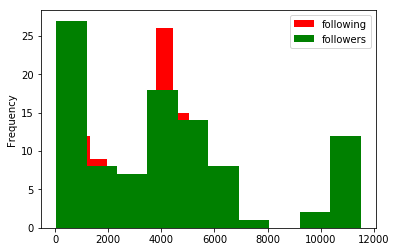

In [15]:
df['following'].resample('W').mean().plot(kind='hist', color='r', legend=True)
df['followers'].resample('W').mean().plot(kind='hist', color='g', legend=True)
plt.show()

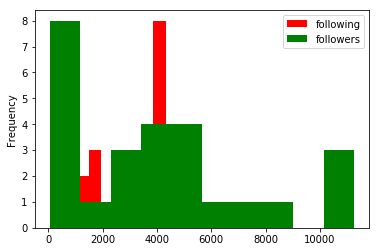

In [16]:
df['following'].resample('M').mean().plot(kind='hist', color='r', legend=True)
df['followers'].resample('M').mean().plot(kind='hist', color='g', legend=True)
plt.show()

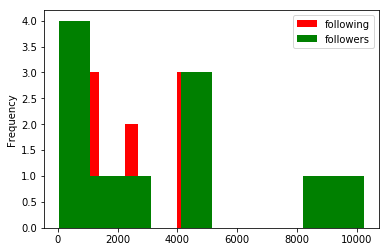

In [17]:
df['following'].resample('Q').mean().plot(kind='hist', color='r', legend=True)
df['followers'].resample('Q').mean().plot(kind='hist', color='g', legend=True)
plt.show()